In [222]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import glob

In [223]:
df = pd.read_csv('oversampling_combined_data_labeled.csv')

In [224]:
df = df.sample(frac=1).reset_index(drop=True)

In [225]:
Y = pd.get_dummies(df['label'])


In [226]:
X = df.drop(['label'],axis=1)
X.columns

Index(['temperature', 'humidity', 'pressure', 'wind_speed', 'wind_direction',
       'rain', 'cloudiness', 'description', 'condition_type'],
      dtype='object')

In [227]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >=0.9 and logs['accuracy'] >= 0.9:
            self.model.stop_training = True

In [228]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [229]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [230]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_13 (Normalization)     │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,910 (179.34 KB)

 Trainable params: 45,891 (179.26 KB)

 Non-trainable params: 19 (80.00 B)

In [231]:
history = model.fit(X, Y, epochs=100, batch_size=16 , validation_split=0.3, verbose=1, callbacks=[CustomCallback(),tf.keras.callbacks.TensorBoard(log_dir="./logs")])

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2995 - loss: 24.8512 - val_accuracy: 0.3492 - val_loss: 1.1643
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3730 - loss: 1.4278 - val_accuracy: 0.3223 - val_loss: 1.5915
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4032 - loss: 1.3350 - val_accuracy: 0.4483 - val_loss: 1.2150
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4690 - loss: 1.1032 - val_accuracy: 0.5517 - val_loss: 0.8821
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4878 - loss: 0.9295 - val_accuracy: 0.4669 - val_loss: 0.9298
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5463 - loss: 0.8641 - val_accuracy: 0.6178 - val_loss: 0.7332
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5774 - loss: 0.8277 - val_accuracy: 0.3864 - val_loss: 1.4945
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5664 - loss: 0.8637 - val_accuracy: 0.6384 - 

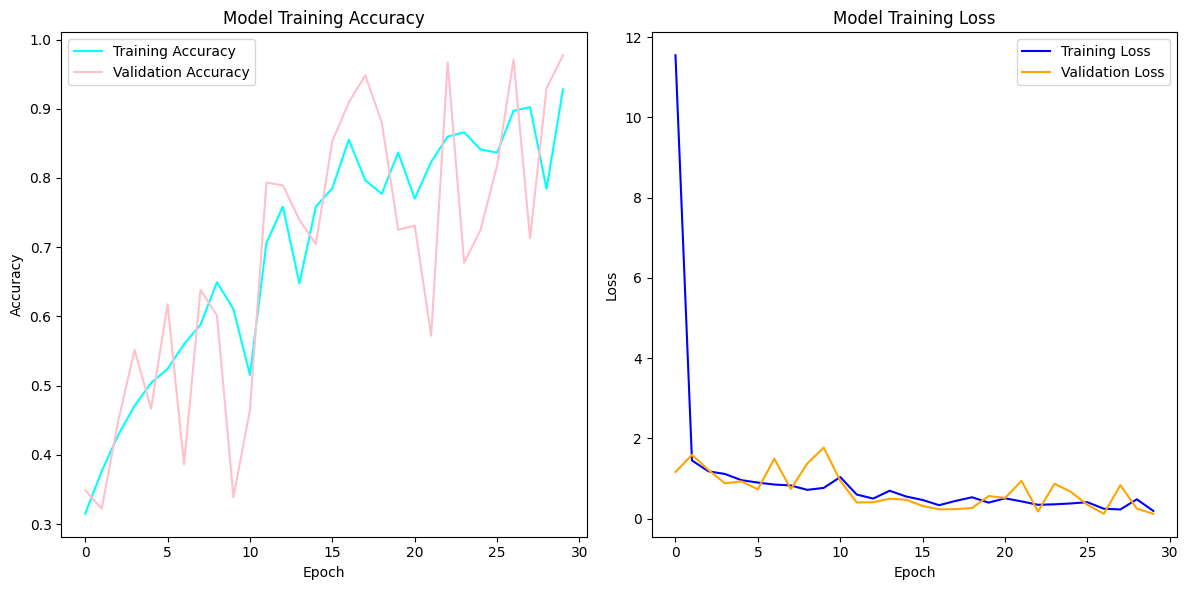

In [232]:
plt.figure(figsize=(12, 6))

# Subplot ketiga untuk training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='cyan')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='pink')
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot keempat untuk training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [233]:
existing_files = glob.glob('./prediksi_banjir_*.keras')

if existing_files:
    os.remove(existing_files[0])

now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

model.save(f"prediksi_banjir_{now}.keras")

In [234]:
label = ['aman','bahaya','waspada']

In [235]:
new_model = tf.keras.models.load_model(f"prediksi_banjir_{now}.keras")
aman = np.round(new_model.predict(np.array([23.46,98,1009,0.43,162,0.0,100,3,0]).reshape(1,-1)),decimals=4) #aman
waspada_md = np.round(new_model.predict(np.array([23.02,99,1010,0.14,309,1.05,86,6,1]).reshape(1,-1)),decimals=4) #waspada moderate rain
waspada_li = np.round(new_model.predict(np.array([23.08,99,1010,0.31,293,0.98,88,4,1]).reshape(1,-1)),decimals=4) #waspada light rain
bahaya = np.round(new_model.predict(np.array([29.56,79,1007,0.83,250,1.35,83,6,1]).reshape(1,-1)),decimals=4) #bahaya

print(aman, label[np.argmax(aman)])
print(waspada_md, label[np.argmax(waspada_md)])
print(waspada_li, label[np.argmax(waspada_li)])
print(bahaya, label[np.argmax(bahaya)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.994e-01 0.000e+00 6.000e-04]] aman
[[0.003  0.3888 0.6082]] waspada
[[0.1051 0.0071 0.8878]] waspada
[[4.000e-04 8.249e-01 1.748e-01]] bahaya


In [236]:
df['predicted'] = [label[np.argmax(x)] for x in new_model.predict(X) ]

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [237]:
df.head()

,temperature,humidity,pressure,wind_speed,wind_direction,rain,cloudiness,description,condition_type,label,predicted
0,28.48,80,1008,1.13,226,1.13,98,6,1,waspada,waspada
1,22.84,98,1011,0.56,313,0.00,43,1,0,aman,aman
2,28.63,84,1007,0.21,196,0.79,100,4,1,aman,waspada
3,28.62,86,1006,0.83,118,1.49,65,6,1,bahaya,bahaya
4,29.40,78,1010,1.05,64,1.74,42,6,1,bahaya,bahaya


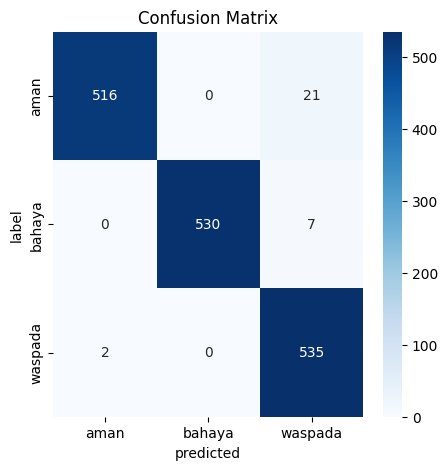

Jumlah prediksi yang tidak tepat: 30


In [238]:
plt.figure(figsize=(5, 5))
sns.heatmap(pd.crosstab(df["label"], df["predicted"]), annot=True, cmap="Blues",fmt='d')
plt.title('Confusion Matrix')
plt.show()

incorrect_predictions = (df["label"] != df["predicted"]).sum()
print("Jumlah prediksi yang tidak tepat:", incorrect_predictions)